In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv


In [2]:
# Import API key 
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=ccb77ed31f80d88327692368ee357b20&units=metric&q='

In [5]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity=[]
wind =[]
cloudiness =[]
country = []
date = []
place = []

count = 0
print('Beginning Data Retrieval')    
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    count = count + 1
    try:
        print("Processing Record {} of Set 1 | {}".format(count,city))
        response = requests.get(query_url + city).json()
#         print(json.dumps(response,indent=4))
#         break
        place.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #print(json.dumps(response,indent=4))
        
    except KeyError:
        print("City not found. Skipping...")
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')        
# print(len(place))
# print(len(lat))
# print(len(lng))
# print(len(temp))
# print(len(humidity))
# print(len(wind))
# print(len(cloudiness))
# print(len(country))
# print(len(date))

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | panguipulli
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | sal rei
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | ginir
Processing Record 19 of Set 1 | half moon bay
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | baripada
Processing Record 22 of Set 1 | bredasdorp
Processing Record 

In [7]:
# Store the values in a dictionary
weather_d = { 'City' : place,
             'City Latitude' : lat,
             'City Longitude' : lng,
             'Max Temperture' : temp,
             'Humidity' : humidity,
             'Cloud coverage' : cloudiness,
             'Wind Speed' : wind,
             'City Country' : country,
             'City DateTime' : date,
}

# Display the DataFrame
weather_df = pd.DataFrame(weather_d)
weather_df.head()



,City,City Latitude,City Longitude,Max Temperture,Humidity,Cloud coverage,Wind Speed,City Country,City DateTime
0,Cherskiy,68.75,161.30,-5.82,94,18,6.64,RU,1571259085
1,Albany,42.65,-73.75,12.64,100,90,3.60,US,1571259085
2,Cockburn Town,21.46,-71.14,30.00,70,75,1.50,TC,1571259085
3,Punta Arenas,-53.16,-70.91,10.69,70,4,6.70,CL,1571259085
4,Torbay,47.66,-52.73,11.95,93,90,4.60,CA,1571259086


In [8]:
# Export the city data into a .csv.
weather_df.to_csv(output_data_file,index=False)

In [33]:
# Get date time for putting time stamp on graphs
date = time.localtime(date[0])
date1 = time.strftime("%m/%d/%Y")
print(date)
print(date1)

time.struct_time(tm_year=1969, tm_mon=12, tm_mday=31, tm_hour=19, tm_min=32, tm_sec=49, tm_wday=2, tm_yday=365, tm_isdst=0)
10/16/2019


# Observed Trend 1 - Latitude VS Temperature
# This shows Equator has highest temperatures
# and Southern hemisphere of earth has higher temperatures as compared to Northern hemisphere

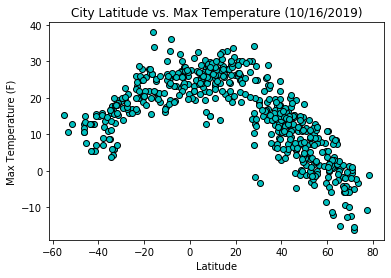

In [34]:
#Latitude vs. Temperature Plot
plt.scatter(lat, temp, marker="o", facecolors="c", edgecolors="black")
plt.title("City Latitude vs. Max Temperature ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("LatitudevsTemp.png")

# Observed Trend 1 - Latitude VS Humidity and cloudiness
# This shows the level of humidity and cloud cover over the listed cities
# At this time of the year (Oct-2019) its mostly rainy and humid in the given Cities 

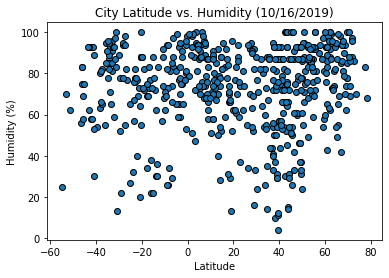

In [35]:
# Latitude vs. Humidity Plot

plt.scatter(lat,humidity,marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatitudevsHumidity.png")

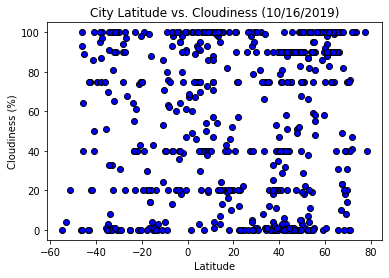

In [36]:
# Latitude vs. Cloudiness Plot

plt.scatter(lat,cloudiness,marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LatitudevsCloudiness.png")

# Observed Trend 3 - Latitude VS Wind Speed
# This particular scatter plot shows the current (Oct-2019) weather trend where is not so windy in given Cities
# But cities really north or south on globe show high wind speeds
# Thats how the cities with High Wind speeds have lesser cloudiness.

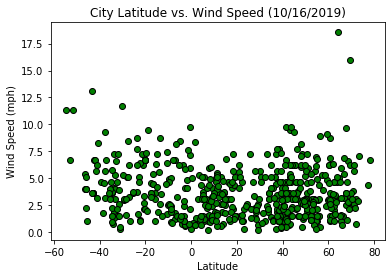

In [37]:
# Latitude vs. Wind Speed Plot

plt.scatter(lat,wind,marker="o", facecolors="green", edgecolors="black")
plt.title("City Latitude vs. Wind Speed ({})" .format(date1))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LatitudevsWind.png")